## Setup

In [7]:
from time import sleep
from bhaptics import haptic_player
import keyboard
from random import shuffle
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from matplotlib import animation


player = haptic_player.HapticPlayer()
sleep(0.4)

dictionary = ["PedestrianLeft", "PedestrianMiddle", "PedestrianRight", "CarLeft", "CarMiddle", "CarRight", "TruckLeft", "TruckMiddle", "TruckRight"]
# 1 = Pedestrian, 2 = Car, 3 = Truck
category = [1, 1, 1, 2, 2, 2, 3, 3, 3]
# 4 = Left, 5 = Middle, 6 = Right
location = [4, 5, 6, 4, 5, 6, 4, 5, 6]
place = None
category_guess = None
curent_trial = 0

# Registering the dictionary
for i in range(9):
    player.register(dictionary[i], dictionary[i] + ".tact")

def playDictionary():
    img = mpimg.imread('road.png')
    image = plt.imshow(img)
    lst = list(range(18))
    shuffle(lst)
    locations_guessed = []
    actual_locations = []
    categories_guessed = []
    actual_categories = []
    locations_correct = []
    categories_correct = []
    for i in lst:
        trial_number = i%9
        player.submit_registered(dictionary[trial_number])
        print("Location:")
        event = keyboard.read_event()
        place = event.name
        print("Category:")
        sleep(0.05)
        event = keyboard.read_event()
        if event.event_type != keyboard.KEY_DOWN:
            event = keyboard.read_event()
        category_guess = event.name
        if int(place) < 4 and int(category_guess) > 3:
            temp = place
            place = category_guess
            category_guess = temp
        locations_guessed.append(place)
        actual_locations.append(location[trial_number])
        categories_guessed.append(category_guess)
        actual_categories.append(category[trial_number])
        locations_correct.append(location[trial_number] == int(place))
        categories_correct.append(category[trial_number] == int(category_guess))
        print(f"Place: Actual: {location[trial_number]}, Guessed: {place}\nCategory: Actual: {category[trial_number]}, Guessed: {category_guess}")
        sleep(2)
    data = pd.DataFrame({'ActualLocation': actual_locations, 'GuessedLocations': locations_guessed, 'LocationCorrect': locations_correct, 'ActualCategory': actual_categories, 'GuessedCategory':categories_guessed, 'CategoryCorrect': categories_correct})
    data.to_csv("Category_Guesses.csv", index_label='TrialNumber')
    
def testVest():
    lst = list(range(9))
    for trial_number in lst:
        player.submit_registered(dictionary[trial_number])
        sleep(2)
        
def trainDictionary():
    for i in range(2):
        lst = list(range(9))
        for trial_number in lst:
            current_trial = trial_number
            player.submit_registered(dictionary[trial_number])
            sleep(2)
        sleep(4)

def audiovisualVibration():
    while True:
        lst = list(range(9))
        shuffle(lst)
        for trial_number in lst:
            player.submit_registered(dictionary[trial_number])
            sleep(2)

### Get familiar to the vibration

In [14]:
testVest()

KeyboardInterrupt: 

### Vibration for audiovisual task

In [ ]:
audiovisualVibration()

### Train the dictionary

<IPython.core.display.Javascript object>


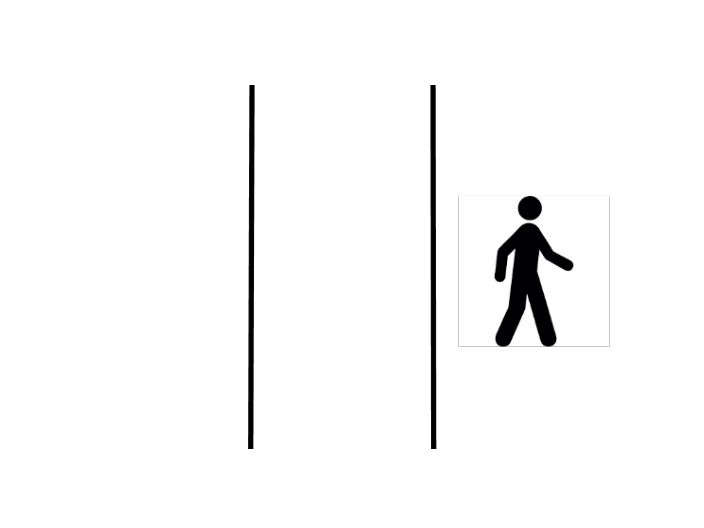

In [13]:
%matplotlib notebook

fig = plt.figure()
img = mpimg.imread('images/road.jpg')
im = plt.imshow(np.zeros((384,576)))
plt.axis('off')

def init():
    im.set_data(np.zeros((nx, ny)))
    
def animate(i):
    im.set_data(mpimg.imread(f'images/{dictionary[i%9]}.png'))
    return im
    
anim = animation.FuncAnimation(fig, animate, frames=9, interval=50)



### Test the dictionary

In [ ]:
playDictionary()

### Test

In [7]:
%matplotlib notebook
from time import sleep
from bhaptics import haptic_player
import keyboard
from random import shuffle
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import time
from matplotlib import animation

dictionary = ["PedestrianLeft", "PedestrianMiddle", "PedestrianRight", "CarLeft", "CarMiddle", "CarRight", "TruckLeft", "TruckMiddle", "TruckRight"]

fig, ax = plt.subplots()

plt.ion()
img = mpimg.imread('images/road.jpg')
image = ax.imshow(img)
fig.canvas.draw_idle()

for i in range(9):
    time.sleep(1)
    image.set_data(mpimg.imread(f'images/{dictionary[i]}.png'))
    fig.canvas.draw_idle()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


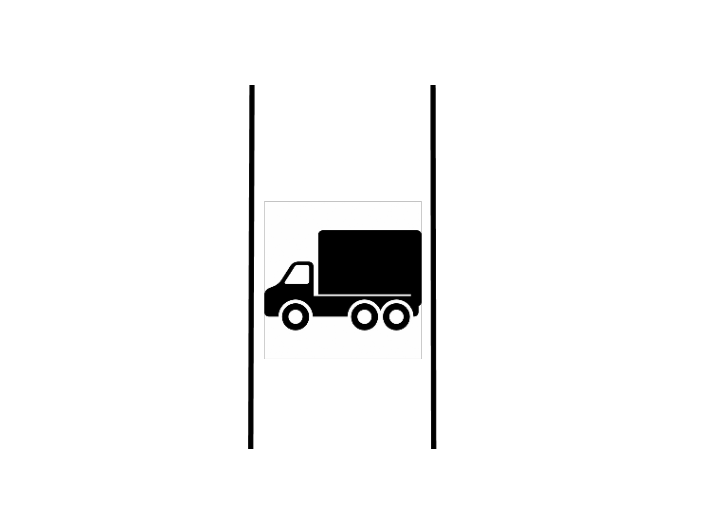

In [11]:
%matplotlib notebook
from time import sleep
from bhaptics import haptic_player
import keyboard
from random import shuffle
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import time
from matplotlib import animation
import numpy as np

dictionary = ["PedestrianLeft", "PedestrianMiddle", "PedestrianRight", "CarLeft", "CarMiddle", "CarRight", "TruckLeft", "TruckMiddle", "TruckRight"]

fig = plt.figure()
img = mpimg.imread('images/road.jpg')
im = plt.imshow(np.zeros((384,576)))
plt.axis('off')
current_trial = 0

def init():
    im.set_data(np.zeros((nx, ny)))
    
def animate(i):
    im.set_data(mpimg.imread(f'images/{dictionary[i%9]}.png'))
    return im
    
anim = animation.FuncAnimation(fig, animate, frames=9, interval=1000)




<IPython.core.display.Javascript object>


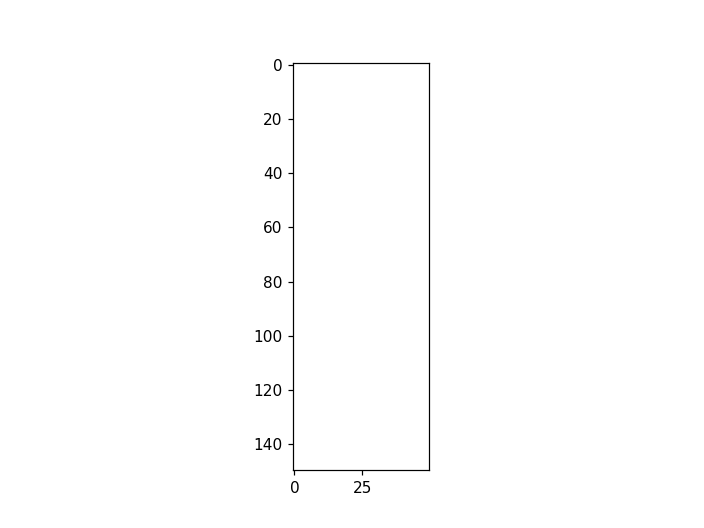

In [3]:
%matplotlib notebook
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

nx = 150
ny = 50

fig = plt.figure()
data = np.zeros((nx, ny))
im = plt.imshow(data, cmap='gist_gray_r', vmin=0, vmax=1)

def init():
    im.set_data(np.zeros((nx, ny)))

def animate(i):
    im.set_data(mpimg.imread(f'images/{dictionary[i%9]}.png'))
    return im

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=nx * ny,
                               interval=50)

In [2]:
%matplotlib notebook
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

nx = 150
ny = 50

fig = plt.figure()
data = np.zeros((nx, ny))
im = plt.imshow(data, cmap='gist_gray_r', vmin=0, vmax=1)

def init():
    im.set_data(np.zeros((nx, ny)))

def animate(i):
    xi = i // ny
    yi = i % ny
    data[xi, yi] = 1
    im.set_data(data)
    return im

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=nx * ny,
                               interval=50)

<IPython.core.display.Javascript object>